In [1]:
import xarray as xr
import os
import errno
import numpy as np
import deepcell
from deepcell import model_zoo
import matplotlib.pyplot as plt

In [2]:
npz_name = "lab_combined_train_nolamin_256x256_stride_0.3_capped_85_centered_nonzero"
training_data = np.load("/data/npz_data/" + npz_name +".npz")
(X_train, y_train) = training_data["X"], training_data["y"]

print('X_train.shape: {}\ny_train.shape: {}'.format(X_train.shape, y_train.shape))

X_train.shape: (1006, 256, 256, 2)
y_train.shape: (1006, 256, 256, 1)


In [3]:
from deepcell import image_generators
DataGenerator = image_generators.ImageFullyConvDataGenerator

from matplotlib.pyplot import imread, imshow, subplots, show


def plot(data_generator, train_dict, channel_idx):
    """
    Plots 4 images generated by an object of the ImageDataGenerator class.
    """
    image_iterator = data_generator.flow(train_dict, transform="pixelwise")
    
    # Plot the images given by the iterator
    fig, rows = subplots(nrows=3, ncols=4, figsize=(18,18))
    for row in range(rows.shape[1]):
        output = image_iterator.next()
        rows[0, row].imshow(output[0][0, :, :, 0])
        rows[1, row].imshow(output[0][0, :, :, 1])
        rows[2, row].imshow(output[1][0, :, :, 0])
        #row.axis('off')
    show()

In [8]:
datagen = DataGenerator(
        rotation_range=180,
        shear_range=0,
        horizontal_flip=False,
        vertical_flip=False,
        fill_mode="mirror",
        cval=0,
        channel_shift_range=0, brightness_range=None)

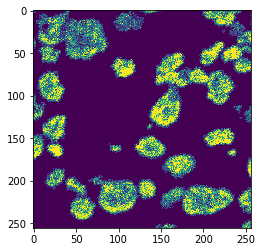

In [5]:
plt.imshow(training_data["X"][658, :, :, 0])

In [6]:
training_data_small_triple_channel = {"X": training_data["X"][658:659, :, :, :2], "y": training_data["y"][658:659, :, :, :]}

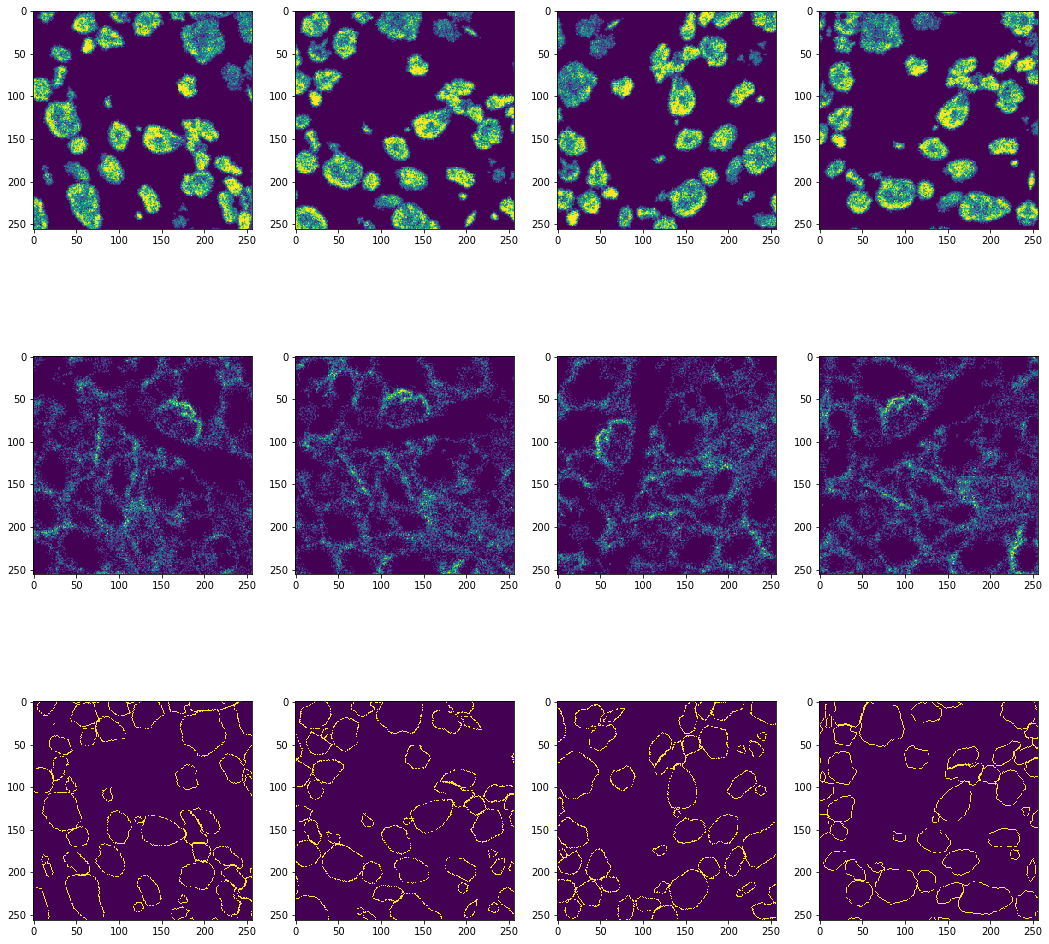

In [9]:
plot(datagen, training_data_small_triple_channel, 0)